In [20]:
# %%px
"""Taylor-Green Vortex at Re = 1600
===================================

https://www.grc.nasa.gov/hiocfd/wp-content/uploads/sites/22/case_c3.3.pdf


"""

import numpy as np

from fluidsim.solvers.ns3d.solver import Simul

params = Simul.create_default_params()

Re = 1600
V0 = 1.0
L = 1
params.nu_2 = V0 * L / Re

params.init_fields.type = "in_script"

params.time_stepping.t_end = 20.0 * L / V0

nx = 64
params.oper.nx = params.oper.ny = params.oper.nz = nx
lx = params.oper.Lx = params.oper.Ly = params.oper.Lz = 2 * np.pi * L

params.output.periods_save.phys_fields = 4
params.output.periods_save.spatial_means = 0.2
params.output.periods_save.spectra = 0.5

sim = Simul(params)

X, Y, Z = sim.oper.get_XYZ_loc()

vx = V0 * np.sin(X / L) * np.cos(Y / L) * np.cos(Z / L)
vy = -V0 * np.cos(X / L) * np.sin(Y / L) * np.cos(Z / L)
vz = sim.oper.create_arrayX(value=0)

sim.state.init_statephys_from(vx=vx, vy=vy, vz=vz)

sim.state.statespect_from_statephys()
sim.state.statephys_from_statespect()

*************************************
Program fluidsim
Manual initialization of the fields is selected. Do not forget to initialize them.
sim:                <class 'fluidsim.solvers.ns3d.solver.Simul'>
sim.output:         <class 'fluidsim.solvers.ns3d.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators3d.OperatorsPseudoSpectral3D'>
sim.state:          <class 'fluidsim.solvers.ns3d.state.StateNS3D'>
sim.time_stepping:  <class 'fluidsim.solvers.ns3d.time_stepping.TimeSteppingPseudoSpectralNS3D'>
sim.init_fields:    <class 'fluidsim.solvers.ns3d.init_fields.InitFieldsNS3D'>

solver ns3d, RK4 and sequential,
type fft: fluidfft.fft3d.with_pyfftw
nx =     64 ; ny =     64 ; nz =     64
Lx = 2pi ; Ly = 2pi ; Lz = 2pi
path_run =
/home/nikhil/Sim_data/ns3d_64x64x64_V2pix2pix2pi_2022-12-26_17-31-18
init_fields.type: in_script



Initialization outputs:
sim.output.cross_corr:        <class 'fluidsim.base.output.cross_corr3d.CrossCorrelations'>
sim.output.phys_fields:       <class 'fluidsim.base.output.phys_fields3d.PhysFieldsBase3D'>
sim.output.spatial_means:     <class 'fluidsim.solvers.ns3d.output.spatial_means.SpatialMeansNS3D'>
sim.output.spatiotemporal_spectra:<class 'fluidsim.solvers.ns3d.output.spatiotemporal_spectra.SpatioTemporalSpectraNS3D'>
sim.output.spectra:           <class 'fluidsim.solvers.ns3d.output.spectra.SpectraNS3D'>
sim.output.spect_energy_budg: <class 'fluidsim.solvers.ns3d.output.spect_energy_budget.SpectralEnergyBudgetNS3D'>
sim.output.temporal_spectra:  <class 'fluidsim.base.output.temporal_spectra.TemporalSpectra3D'>

Memory usage at the end of init. (equiv. seq.): 491.5078125 Mo
Size of state_spect (equiv. seq.): 6.488064 Mo


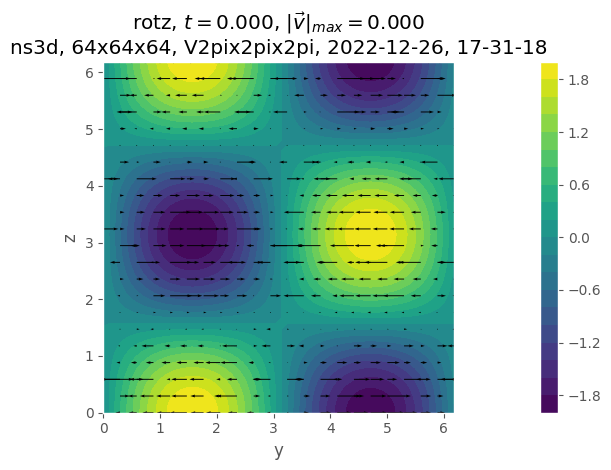

In [21]:
%matplotlib inline
sim.output.init_with_initialized_state()
sim.output.phys_fields.plot(equation=f'x={sim.oper.Lx/4}')

In [22]:
sim.time_stepping.start()

*************************************
Beginning of the computation
save state_phys in file state_phys_t0000.000.nc
    compute until t =         20
it =      0 ; t =            0 ; deltat  =   0.049087
              energy = 1.250e-01 ; Delta energy = +0.000e+00

MEMORY_USAGE:                  498.72265625 Mo
it =     22 ; t =      1.03949 ; deltat  =   0.045077
              energy = 1.245e-01 ; Delta energy = -5.053e-04
              estimated remaining duration = 0:00:39
MEMORY_USAGE:                  547.7578125 Mo
it =     45 ; t =      2.03613 ; deltat  =   0.040479
              energy = 1.239e-01 ; Delta energy = -6.037e-04
              estimated remaining duration = 0:00:42
MEMORY_USAGE:                  547.85546875 Mo
it =     70 ; t =      3.00662 ; deltat  =   0.037703
              energy = 1.230e-01 ; Delta energy = -8.737e-04
              estimated remaining duration = 0:00:44
MEMORY_USAGE:                  547.85546875 Mo
it =     97 ; t =       4.0057 ; deltat  =   

In [23]:
sim.output.path_run

'/home/nikhil/Sim_data/ns3d_64x64x64_V2pix2pix2pi_2022-12-26_17-31-18'

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rc("figure", dpi=100)

In [25]:
import fluidsim as fs

sim = fs.load_state_phys_file(
    sim.output.path_run
)

*************************************
Program fluidsim
Load state from file:
[...]data/ns3d_64x64x64_V2pix2pix2pi_2022-12-26_17-31-18/state_phys_t0020.031.nc
sim:                <class 'fluidsim.solvers.ns3d.solver.Simul'>
sim.output:         <class 'fluidsim.solvers.ns3d.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators3d.OperatorsPseudoSpectral3D'>
sim.state:          <class 'fluidsim.solvers.ns3d.state.StateNS3D'>
sim.time_stepping:  <class 'fluidsim.solvers.ns3d.time_stepping.TimeSteppingPseudoSpectralNS3D'>
sim.init_fields:    <class 'fluidsim.solvers.ns3d.init_fields.InitFieldsNS3D'>

solver ns3d, RK4 and sequential,
type fft: fluidfft.fft3d.with_pyfftw
nx =     64 ; ny =     64 ; nz =     64
Lx = 2pi ; Ly = 2pi ; Lz = 2pi
path_run =
/home/nikhil/Sim_data/ns3d_64x64x64_V2pix2pix2pi_2022-12-26_17-31-18
init_fields.type: from_file

Initialization outputs:
sim.output.cross_corr:        <class 'fluidsim.base.output.cross_corr3d.CrossCorrelations'>
sim.output.ph

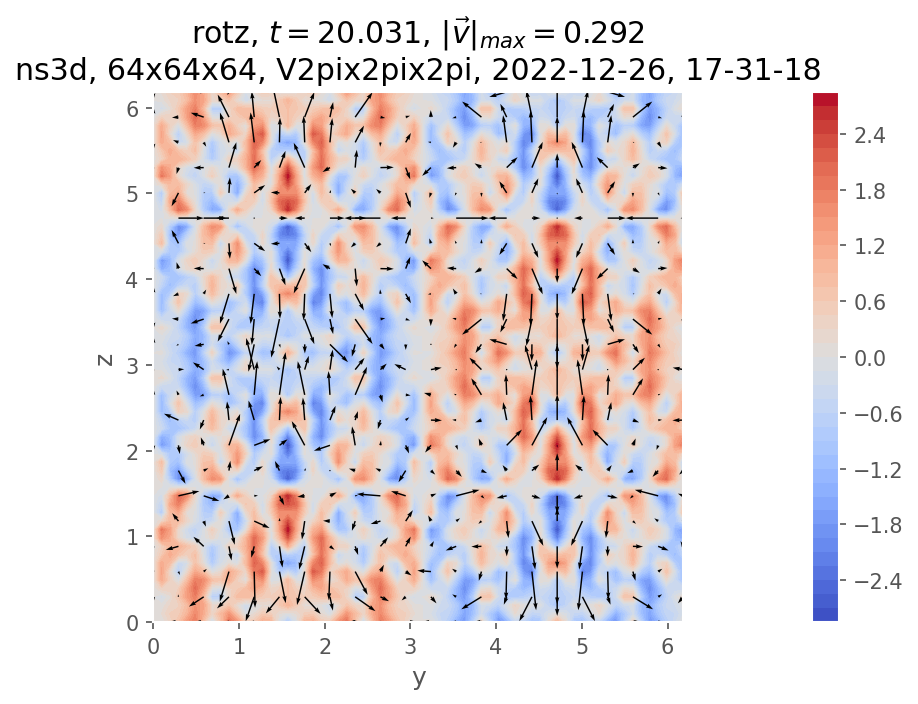

In [26]:
%matplotlib inline
plt.figure(0, dpi=150)
sim.output.phys_fields.plot(
    equation=f"x={sim.oper.Lx/4}", numfig=0, nb_contours=50, cmap="coolwarm"
)

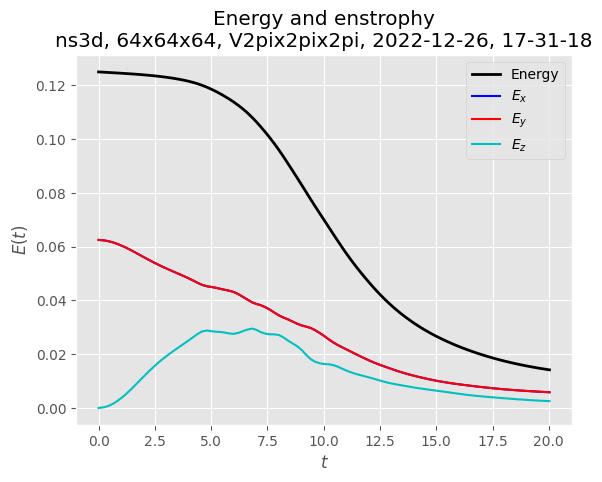

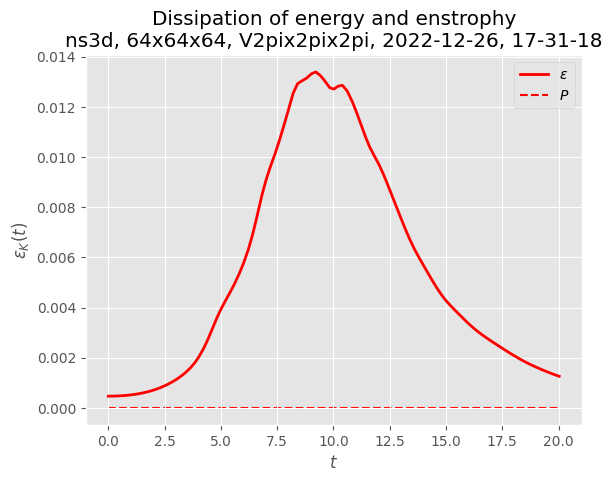

In [27]:
sim.output.spatial_means.plot()